In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
!pip install tensorflow==2.5

In [ ]:
!pip install keras==2.4.3

In [ ]:
import io

In [ ]:
dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [ ]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,3.728215,15.4,44.0,7800.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,3.874993,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,4.944903,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,3.462571,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
dataset.shape

(400, 25)

In [ ]:
dataset=dataset.drop(['age','bp','sg','al','su','bgr','wc','appet','pe','ane'],1)

In [ ]:
# dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
# dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
# dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
# dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
# dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
# dataset.rename(columns={'classification':'class'},inplace=True)

In [ ]:
# # Further cleaning
# dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
# dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
# dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
# dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
# dataset.drop('id',axis=1,inplace=True)

In [ ]:
dataset.head()

,bu,sc,sod,pot,hemo,pcv,rc,rbc,pc,pcc,ba,htn,dm,cad,class
0,36.0,1.2,138.672705,3.728215,15.4,44.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,18.0,0.8,130.739113,3.874993,11.3,38.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,53.0,1.8,132.762387,4.944903,9.6,31.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.0,3.8,111.000000,2.500000,11.2,32.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,26.0,1.4,133.960632,3.462571,11.6,35.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# # '?' character remove process in the dataset
# for i in ['rc','wc','pcv']:
#     dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

In [ ]:
# # Filling missing numeric data in the dataset with mean
# for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
#     dataset[i].fillna(dataset[i].mean(),inplace=True)

In [ ]:
dataset.isnull().sum()

bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
rc       0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
class    0
dtype: int64

In [ ]:
dataset.shape

(400, 15)

In [ ]:
dataset = dataset.dropna(axis=1)

In [ ]:
dataset.shape

(400, 15)

In [ ]:
dataset.isnull().sum()

bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
rc       0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
class    0
dtype: int64

In [ ]:
#dataset.head()

In [ ]:
dataset.iloc[:,:-1]

,bu,sc,sod,pot,hemo,pcv,rc,rbc,pc,pcc,ba,htn,dm,cad
0,36.0,1.2,138.672705,3.728215,15.4,44.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,18.0,0.8,130.739113,3.874993,11.3,38.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,1.8,132.762387,4.944903,9.6,31.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56.0,3.8,111.000000,2.500000,11.2,32.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,26.0,1.4,133.960632,3.462571,11.6,35.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49.0,0.5,150.000000,4.900000,15.7,47.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,31.0,1.2,141.000000,3.500000,16.5,54.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,26.0,0.6,137.000000,4.400000,15.8,49.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,50.0,1.0,135.000000,4.900000,14.2,51.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset.iloc[:,-1]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import time
start_time = time.time()
# The GRU architecture
model = Sequential()
# First GRU layer with Dropout regularisation
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Fourth GRU layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling the RNN
model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error', metrics = ['accuracy'])
# Fitting to the training set
model.fit(X_train,y_train,epochs=200,batch_size=150,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
3/3 [==============================] - 8s 843ms/step - loss: 0.5517 - accuracy: 0.3812 - val_loss: 0.2938 - val_accuracy: 0.3500
Epoch 2/200
3/3 [==============================] - 0s 67ms/step - loss: 0.2613 - accuracy: 0.5156 - val_loss: 0.2727 - val_accuracy: 0.6500
Epoch 3/200
3/3 [==============================] - 0s 61ms/step - loss: 0.3419 - accuracy: 0.6187 - val_loss: 0.3021 - val_accuracy: 0.6500
Epoch 4/200
3/3 [==============================] - 0s 62ms/step - loss: 0.2991 - accuracy: 0.6187 - val_loss: 0.2150 - val_accuracy: 0.6500
Epoch 5/200
3/3 [==============================] - 0s 62ms/step - loss: 0.2337 - accuracy: 0.6156 - val_loss: 0.2774 - val_accuracy: 0.3500
Epoch 6/200
3/3 [==============================] - 0s 61ms/step - loss: 0.2889 - accuracy: 0.3969 - val_loss: 0.2995 - val_accuracy: 0.3500
Epoch 7/200
3/3 [==============================] - 0s 62ms/step - loss: 0.2812 - accuracy: 0.3969 - val_loss: 0.2315 - val_accuracy: 0.8750
Epoch 8/200
3/3 [==

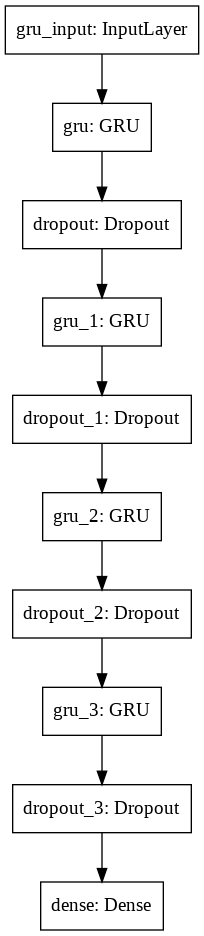

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_gru_rfe.png')

In [ ]:
# from google.colab import files
# files.download('model_plot_gru_rfe.png') 

In [1]:
import matplotlib.pyplot as plt

# fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('GRU_rfe')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('GRU_rfe.png', dpi=100)

NameError: ignored

In [ ]:
# from google.colab import files
# files.download('GRU_rfe.png') 

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
from sklearn.metrics import accuracy_score
first = 0
second = 50
prediction_accuracy = []
for i in range(8):
  X_test_ = dataset.iloc[first:second,:-1].values
  y_true = dataset.iloc[first:second,-1].values

  X_test_  = scaler.transform(X_test_)
  X_test_ = np.reshape(X_test_, (X_test_.shape[0],X_test_.shape[1],1))
  y_pred = model.predict_classes(X_test_)
  accuracy = accuracy_score(y_true, y_pred)
  prediction_accuracy.append(accuracy)

  first = second
  second = second+50
prediction_accuracy

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('GRU_rfe')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
data = {
    'GRU_false': false_positive_rate,
    'GRU_true': true_positive_rate,
    'GRU_prediction_accuracy': prediction_accuracy
  }

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [ ]:
df.to_csv('gru_rfe_output.csv', index=False)

In [ ]:
# from google.colab import files
# files.download('gru_rfe_output.csv') 

In [ ]:
# from google.colab import files
# #files.download('dataset_ckd.csv') 